In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Load data.
data = read_csv(os.path.join('data', 'data.csv'))

## Initialize DataFrame.
screen = dict(subject = np.unique(data.subject))

## Section 1: Data Screening

#### 1.1 Browser interactions

Browser interactions include switching tabs, minimizing a browser window, or otherwise disengaging from the browser window in which the experiment is active. 

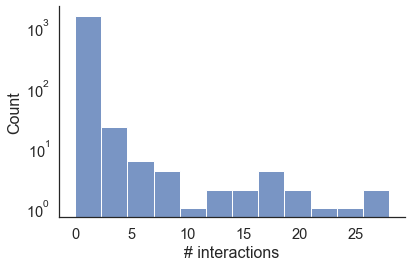

In [2]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = data.groupby('subject').browser_interactions.sum()
screen['interactions'] = gb.values

## Plot interactions.
sns.histplot(x=gb, color='#4c72b0', ax=ax)
ax.set(xlabel='# interactions', yscale='log')

sns.despine()
plt.tight_layout()

#### 1.2 Screen resolution

Checks for trials in which size of a participant's browser window was smaller than the minimum requirements in order to see the whole puzzle and distractors.

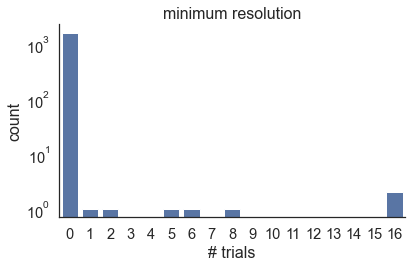

In [3]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = data.groupby('subject').minimum_resolution.apply(lambda x: (1-x).sum())
screen['resolution'] = gb.values

## Plot interactions.
sns.countplot(x=gb, color='#4c72b0', order=np.arange(17), ax=ax)
ax.set(xlabel='# trials', yscale='log', title='minimum resolution')

sns.despine()
plt.tight_layout()

#### 1.3 Missing response

Missing responses are when participants do not choose a response option with the 30s response window.

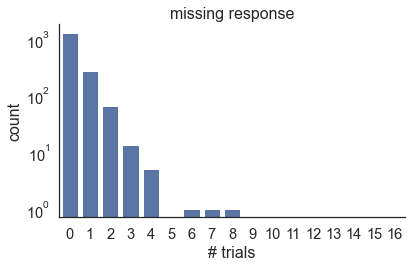

In [4]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = data.groupby('subject').accuracy.apply(lambda x: x.isnull().sum())
screen['missing'] = gb.values

## Plot interactions.
sns.countplot(x=gb, color='#4c72b0', order=np.arange(17), ax=ax)
ax.set(xlabel='# trials', yscale='log', title='missing response')

sns.despine()
plt.tight_layout()

#### 1.4 Rapid response

Rapid guessing responses were defined as responses made within 3s.

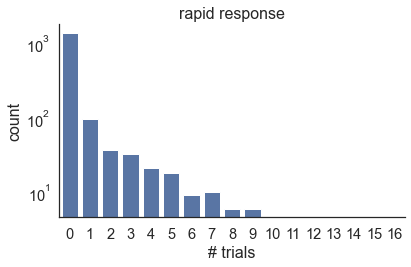

In [5]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Compute total interactions per subject.
gb = data.groupby('subject').rt.apply(lambda x: (x < 3).sum())
screen['rapid'] = gb.values

## Plot interactions.
sns.countplot(x=gb, color='#4c72b0', order=np.arange(17), ax=ax)
ax.set(xlabel='# trials', yscale='log', title='rapid response')

sns.despine()
plt.tight_layout()

## Section 2: Apply Rejections

#### 2.1 Define rejections

In [6]:
## Convert to DataFrame.
screen = DataFrame(screen)
reject = screen[['subject']].copy()

## Apply rejections.
reject['resolution'] = np.where(screen.resolution > 0, 1, 0)
reject['missing'] = np.where(screen.missing >= 4, 1, 0)
reject['rapid'] = np.where(screen.rapid >= 4, 1, 0)
reject['reject'] = reject[['resolution','missing','rapid']].sum(axis=1)

## Save.
reject.to_csv(os.path.join('data', 'reject.csv'), index=False)

#### 2.2 Summarize rejections

In [7]:
## Compute total rejections.
N = reject.shape[0]
K = reject.query('reject > 0').shape[0]
print('Summary:\n%s / %s (%0.2f%%) rejected\n' %(K,N,K/N*100))

## Compute sums by cause.
print('Resolution:\tN=%s' %reject.resolution.sum())
print('Missing:\tN=%s' %reject.missing.sum())
print('Rapid:\t\tN=%s' %reject.rapid.sum())

Summary:
83 / 1584 (5.24%) rejected

Resolution:	N=7
Missing:	N=8
Rapid:		N=70
